<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('datasets/real_estate_data.csv', sep = '\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца.

Согласно документации к данным:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении


Типы данных в столбцах целочисленные, вещественные, строковые и булевы. 
В данных есть пропущенные значения.

### Вывод

В каждой строке таблицы хранится информация об объявлении о продаже квартиры в Санкт-Петербурге и соседних населённых пунктах за несколько лет. На первый взгляд данных хватает для исследования. 
Однако по первой полученной информации о таблице видно, что в таблице много пропусков и не во всех столбцах подходящий тип данных.

Также видно очень много пропусков в данных, полученных автоматически на основе картографических данных. Возможно система работает некорректно, стоит обратить на это внимание.

## Предобработка данных

Согласно полученной информации о таблице, пропущенных значений нет в столбцах `total_images`, `last_price`, `total_area`, `first_day_exposition`, `rooms`, `floor`, `studio`, `open_plan`.

Пропущенных значений в столбце `ceiling_height` (высота потолков (м)) очень много, поэтому удалить эти строки нельзя, а заполнить подходящими значениями их невозможно, так как нет подходящих параметров, от которых можно отталкиваться, так что их решено оставить пустыми. 

Пропущенных значений в столбцах`airports_nearest` (расстояние до ближайшего аэропорта в метрах (м)), `cityCenters_nearest` ( расстояние до центра города (м)), `parks_nearest` (расстояние до ближайшего парка (м)), `ponds_nearest` (расстояние до ближайшего водоёма (м)) слишком много, поэтому их также решено оставить пустыми. 

Пропущенные значения в столбцах `balcony` (число балконов), `parks_around3000` (число парков в радиусе 3 км), `ponds_around3000` (число водоёмов в радиусе 3 км) решено заменить на 0, так как пропуск в этих категориях скорее всего обозначает их отсутствие.

In [3]:
columns = ['balcony', 'parks_around3000', 'ponds_around3000']
for column in columns:
    data[column] = data[column].fillna(0)
for column in columns:
    print(data[column].isna().sum())

0
0
0


Пропущенные значения столбца `is_apartment` (апартаменты (булев тип)) можно заменить на значение 'False', так как скорее всего они не заполнены, так как в этих объявлениях речь не о продаже апартаментов. Так же нужно поменять тип данных на логический.

In [4]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].astype('bool')

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: bool

Можно предположить, что пропущенные значения в столбце `days_exposition` (сколько дней было размещено объявление (от публикации до снятия) есть в таблице, так как эти публикации еще не сняты. 

Так как дата формирования таблицы неизвестна, то возьмем самую ближайшую дату публикации объявления и будем считать, что объявления с пропущенными значениями `days_exposition` были закрыты в этот день.

Для начала приведем стоблец `first_days_exposition` к типу данных 'дата'. 

In [5]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format ='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [6]:
for i in range(len(data)):
    delta = data['first_day_exposition'].max() - data['first_day_exposition'][i]
    if np.isnan(data['days_exposition'][i]):
        data['days_exposition'][i] = delta.days

<ipython-input-6-850087a202fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['days_exposition'][i] = delta.days


In [7]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,15.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Для заполнения пропущенных значений в столбцах `kitchen_area` и `living_area` медианным значением зависящим от общей площади квартиры. Для этого добавим столбцы с отношением площади кухни к общей площади и жилой площади к общей площади.

In [8]:
data['kitchen_%_total'] = data['kitchen_area']/data['total_area']
data['kitchen_%_total'] = data['kitchen_%_total'].fillna(data['kitchen_%_total'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_%_total']*data['total_area'])

data['living_%_total'] = data['living_area']/data['total_area']
data['living_%_total'] = data['living_%_total'].fillna(data['living_%_total'].median())
data['living_area'] = data['living_area'].fillna(data['living_%_total']*data['total_area'])
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_%_total,living_%_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57.0,0.231481,0.472222
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.600000,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.272277,0.460396
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.148214,0.612500
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,90.289724,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.172414,0.567860
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.410000,0.320000
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.400000,5,False,...,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,0.299342,0.473684
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.600000,6,False,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.386059,0.284182
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,40.658769,22,False,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,15.0,0.263966,0.567860
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.430000,26,False,...,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0,0.265682,0.465320
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0.106557,0.714754


Для того, чтобы исследовать названия насленных пунктов нужно удалить дубликаты. Посмотрим на все уникальные значения в этом столбце.

In [9]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Сразу видны дубликаты связанные с буквами "е" и "ё". Решено было заменить все буквы "ё" на "е".

А пропущенные значения на "Название не указано".

In [10]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].fillna('Название не указано')

Но этого мало. Ещё есть неочевидные дубликаты, где указаны разные обозначения, например "деревня Кудрово" и "Кудрово". Решено удалить все обозначения и оставить только названия.

In [11]:
list_for_replace = ['поселок', 'село', 'городской', 'городского', 'типа', 'садоводческое', 'некоммерческое', 'садовое', 'товарищество', 'деревня', 'коттеджный', 'станции']
for value in list_for_replace:
    data['locality_name'] = data['locality_name'].str.replace(value, '') #удаление всех обозначений, чтобы исследовать только названия
data['locality_name'] = data['locality_name'].str.lstrip() #удаление пробелов в начале строк
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Пропущенных значений в столбце `floors_total` (всего этажей в доме) относительно всех таблицы мало, поэтому эти строки решено удалить. 

Столбцы 'floors_total', 'last_price', 'parks_around3000', 'ponds_around3000', 'days_exposition' должны иметь целочисленные значения, так что в них можно произвести замену вещественного типа данных на целочисленный.

In [12]:
data.dropna(subset = ['floors_total'], inplace = True)

data[['floors_total', 'last_price', 'parks_around3000', 'ponds_around3000', 'days_exposition']] = data[['floors_total', 'last_price', 'parks_around3000', 'ponds_around3000', 'days_exposition']].astype('int')

In [13]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_%_total,living_%_total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,57,0.231481,0.472222
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,Шушары,12817.0,18603.0,0,NaN,0,NaN,81,0.272277,0.460396
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,0.148214,0.612500
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.289724,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,0.172414,0.567860
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,0.410000,0.320000


Так же нужно проверить таблицу на полные дубликаты строк.

In [14]:
data.duplicated().sum()

0

### Вывод

При предобработке данных насколько это возможно были обработаны пропущенные значения:
- В `balcony`, `parks_around3000`, `ponds_around3000` они заменены на 0.
- В `locality_name` заменены на "Название не указано"
- В `kitchen_area` и `living_area` они заполнены медианным значением зависящим от общей площади квартиры.
- В `days_exposition` заполнены значениями зависящими от даты публикации и даты последнего объявления.

Обработаны дубликаты в столбце `locality_name`. Также проверено отсутствие полных дубликатов.

Значения столбца `first_days_exposition` приведены к типу данных "дата". Столбца `is_apartment` к логическому типу данных.
А столбцы `floors_total`, `last_price`, `parks_around3000`, `ponds_around3000`, `days_exposition` приведены к целочисленному типу данных.

## Расчёты и добавление результатов в таблицу

При предобработке данных уже были добавлены столбцы соотношения жилой и общей площади `living_%_total`, а также отношения площади кухни к общей `kitchen_%_total`.

Рассчитаем и добавим в таблицу цену квадратного метра `price_meter`.

In [15]:
data['price_meter'] = (data['last_price']/data['total_area']).astype('int')

Также добавим день недели, месяц и год публикации объявления `weekday_exposition`, `month_exposition`, `year_exposition`.

In [16]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

И этаж квартиры `floor_group`
Варианты — первый, последний, другой.

In [17]:
def floor_group(row_values):
    if row_values['floor'] == row_values['floors_total']:
        return 'последний'
    if row_values['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
data['floor_group'] = data.apply(floor_group, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,kitchen_%_total,living_%_total,price_meter,weekday_exposition,month_exposition,year_exposition,floor_group
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,57,0.231481,0.472222,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0,NaN,81,0.272277,0.460396,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,2,574.0,558,0.148214,0.612500,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.289724,9,False,...,3,234.0,424,0.172414,0.567860,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121,0.410000,0.320000,100000,1,6,2018,другой


### Вывод

В таблицу добавлены:
- `price_meter` цена квадратного метра;
- `weekday_exposition` день недели, `month_exposition` месяц и `year_exposition` год публикации объявления;
- `floor_group` этаж квартиры; варианты — первый, последний, другой;
- `living_%_total` соотношение жилой и общей площади, а также `kitchen_%_total` отношение площади кухни к общей.

## Исследовательский анализ данных

Для изучения таких параметров, как площадь, цена, число комнат, высота потолков, построим гистрограммы. Рассмотрим только нормальные значения, без учета выбросов.

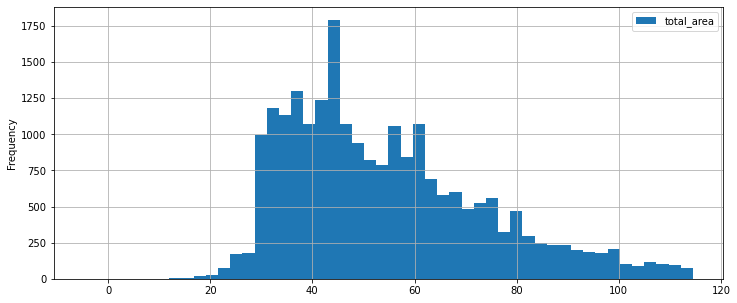

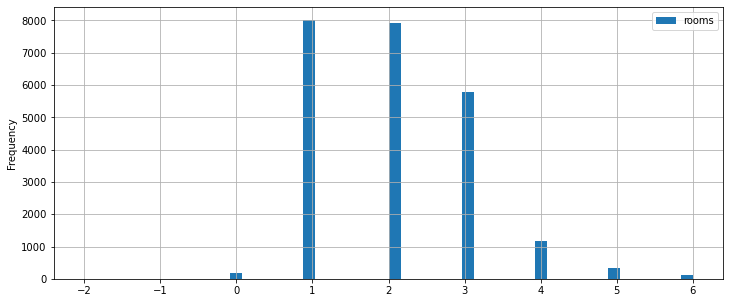

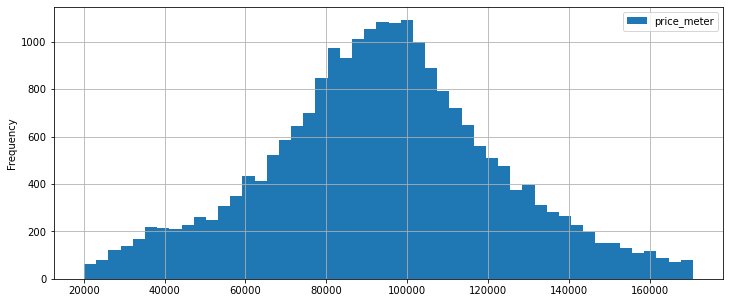

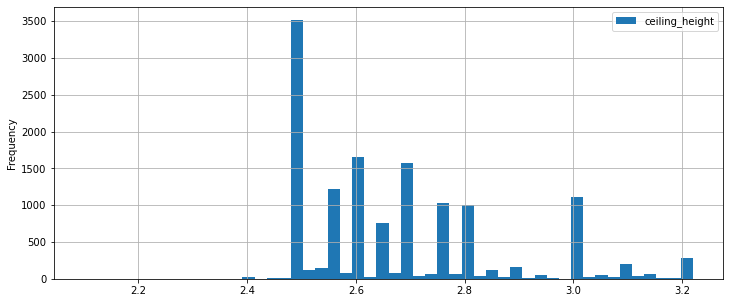

In [18]:
columns = ['total_area', 'rooms', 'price_meter', 'ceiling_height']
for column in columns:
    #расчет IQR для нахождения интервала наиболее вероятных значений 
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    igr = q3 - q1
    data.plot(kind = 'hist',y = column, bins = 50, grid=True, range = (q1 - 1.5*igr, q3 + 1.5*igr ), figsize = (12,5))

Большая часть продаваемых квартир по площади находятся в промежутке от 30 до 60 кв.метров. Продажи больших по площади квартир снижаются в соответствии с их размером.

Лучше всего продаются 1-комнатные и 2-комнатные квартиры, чуть меньше продается 3-комнатных. Далее в соответствиис увеличением количество комнат продажи значительно снижаются. Также продалось очень мало 0-комнатных квартир (видимо это совсем маленькие студии).

Распеределение цен на квадратный метр на данном интервале стремить к нормальному. Пик приходится на 100000 рублей за кв.метр.

Самая часто встречаемая высота потолков примерно 2.5 метра. 

Уберем редкие и выбивающиеся значения и внесем все отфильтрованные значения в таблицу data_good:

In [19]:
columns = ['total_area', 'rooms', 'price_meter', 'ceiling_height']
for column in columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    igr = q3 - q1
    a = q1 - 1.5*igr
    b = q3 + 1.5*igr
    data_good = data[(a < data[column]) & (data[column] < b)]

Для изучения времени продажи квартиры построим гистограмму и посмотрим общие статистические данные о столбце `days_exposition`.|

Text(0.5, 1.0, 'days_exposition')

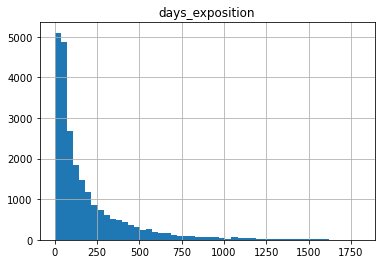

In [20]:
data['days_exposition'].hist(bins=50, range=(0, 1800)).set_title('days_exposition')

In [21]:
pd.set_option('display.float_format', '{:,.2f}'.format)
data['days_exposition'].describe()

count   23,613.00
mean       185.87
std        233.42
min          0.00
25%         43.00
50%         94.00
75%        237.00
max      1,618.00
Name: days_exposition, dtype: float64

Среднее значение примерно в два раза больше медианы, значит есть большие значения, которые влияют на среднее. Построим диаграму размаха.

<AxesSubplot:>

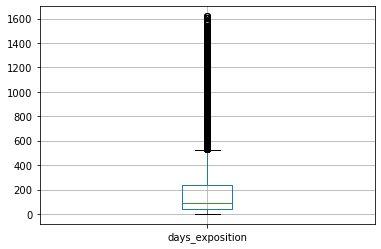

In [22]:
data.boxplot(column='days_exposition')

Медианное значение говорит о том, что половина квартир продается в течение 3-х месяцев. Продажу можно считать быстрой, если квартира продалась примерно за месяц. А слишком долгой, если не продается больше 7-8 месяцев.

По гистограмме видно, что есть часть объявлений, которые остаются на сайте в течение нескольких лет. Они и влияют на среднее значение.
Исходя из диаграмы размаха, для дальнейшего исследования можно использовать объявления, которые провели на сайте не более 1,5-ра лет.

In [23]:
data_good = data.query('days_exposition < 550')

Рассмотрим факторы, которые могут влиять на стоимость квартиры: площадь, число комнат, удалённость от центра. 

In [24]:
data_good['total_area'].corr(data_good['price_meter'])

0.2929287445143118

In [25]:
data_good['cityCenters_nearest'].corr(data_good['price_meter'])

-0.31465544997316097

Корреляция между выбранными факторами либо слишком мала, либо отсутвует вовсе.

Однако, если считать, что она всё есть, хоть и не большая, то можно сказать, что при увеличении общей площади квартиры растет цена за квадратный метр. А при уменьшении расстояния до центра города, цена за метр растет.

Рассмотрим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
Также изучим зависимость от даты размещения: дня недели, месяца и года.

In [26]:
columns = ['floor_group', 'weekday_exposition', 'month_exposition', 'year_exposition']
for column in columns:
    display(data_good.pivot_table(index=column, values='price_meter', aggfunc='median').sort_values('price_meter'))

,price_meter
floor_group,
первый,81355
последний,87287
другой,98039


,price_meter
weekday_exposition,
5,"93,654.00"
4,"94,444.00"
6,"94,444.00"
0,"94,670.50"
3,"94,754.00"
2,"95,504.00"
1,"95,533.50"


,price_meter
month_exposition,
6,"92,215.00"
5,"92,857.00"
10,"93,548.00"
12,"93,600.50"
1,"94,913.00"
2,"95,000.00"
7,"95,000.00"
9,"95,263.00"
11,"95,378.00"


,price_meter
year_exposition,
2015,"90,721.50"
2016,"91,498.00"
2017,"92,187.00"
2018,"95,669.50"
2019,"103,199.00"


Средняя цена за кв.метр ниже всего на первом этаже, чуть выше на последнем этаже. На других этажах средня цена значительно выше первого и последнего этажей.

Самая высокая средняя цена за кв.метр у квартир выставленных на продажу во вторник, а самая низкая у квартир выставленных в субботу.

Самая высокая средняя цена за кв.метр у квартир выставленных на продажу в апреле, а самая низкая у квартир выставленных в мае и июне.

С 2015 по 2019 год средняя стоимость квадратного метра постепенно растет. Однако значение в 2014 году было выше, чем в 2019 году. Этот резкий скачок можно объяснить экономическими факторами в РФ.

Выделим населённые пункты с самой высокой и низкой стоимостью жилья среди 10 населённых пунктов с наибольшим числом объявлений.

In [27]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург    15651
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

In [28]:
filtered_list_locality_name = [
    'Санкт-Петербург',
    'Мурино',
    'Кудрово',
    'Шушары',
    'Всеволожск',
    'Пушкин',
    'Колпино',
    'Парголово',
    'Гатчина',
    'Выборг'
]

In [29]:
data.query('locality_name in @filtered_list_locality_name').pivot_table(index='locality_name', values='price_meter', aggfunc='mean').sort_values(by = 'price_meter', ascending = False)

,price_meter
locality_name,
Санкт-Петербург,"114,868.43"
Пушкин,"103,125.37"
Кудрово,"95,260.39"
Парголово,"90,175.49"
Мурино,"86,040.66"
Шушары,"78,550.88"
Колпино,"75,424.15"
Гатчина,"68,745.69"
Всеволожск,"68,654.01"


Самая высокая стоимость жилья в Санкт-Петербурге - 114868.433902 р/кв.м.

Самая низкая стоимость жилья в Выборге - 58141.489451 р/кв.м.


Изучите предложения квартир в Санкт-Петербурге и выясним какая область входит в центр.

In [30]:
data_spb = data_good.query('locality_name == "Санкт-Петербург"') #выделим квартиры в СПБ в отдельную таблицу
data_spb.dropna(subset = ['cityCenters_nearest'], inplace = True)

<ipython-input-30-84e9ff4ff83a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb.dropna(subset = ['cityCenters_nearest'], inplace = True)


In [31]:
data_spb.loc[:,'cityCenters_nearest_km'] = data_spb['cityCenters_nearest']//1000 #создадим столбец с целыми значениями в километрах

C:\Users\panik\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\panik\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Построим график зависимости цены от удалённости от центра, наложим на него график зависимости количества объявлений от удалённости от центра. 

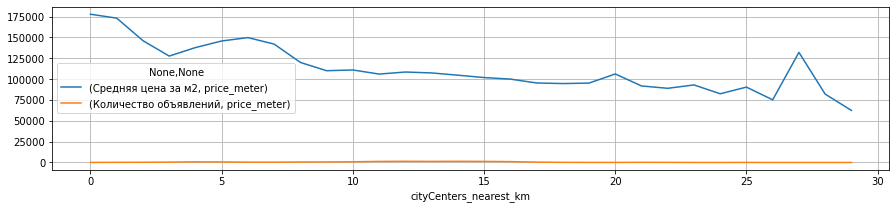

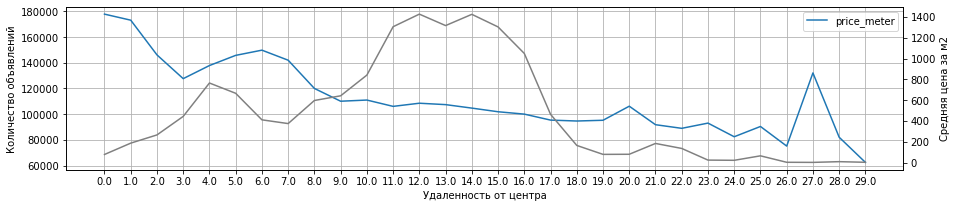

In [32]:
report = (data_spb
          .pivot_table(index='cityCenters_nearest_km', values='price_meter', aggfunc=['mean', 'count'])
          .rename(columns = {'mean' : 'Средняя цена за м2', 'count' : 'Количество объявлений'})
         )
ax = report.plot(grid=True, figsize=(15, 3))
ax = report['Средняя цена за м2'].plot(grid=True, figsize=(15, 3))
ax.set_xlabel('Удаленность от центра')
ax.set_ylabel('Количество объявлений')
bx = report['Количество объявлений'].plot(figsize=(15, 3), ax = ax.twinx(), color = 'grey', legend = False)
plt.xticks(report.index.values, report.index.values)
bx.set_ylabel('Средняя цена за м2')
plt.show()

При удаленности от центра в 7 км начинает падать цена и резко растет число объявлений. Поэтому центральной зоной можно считать значения от 0 до 7 км.

Выделим сегмент квартир в центре.

In [33]:
data_spb_center = data_spb.query('cityCenters_nearest_km <= 7')

Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

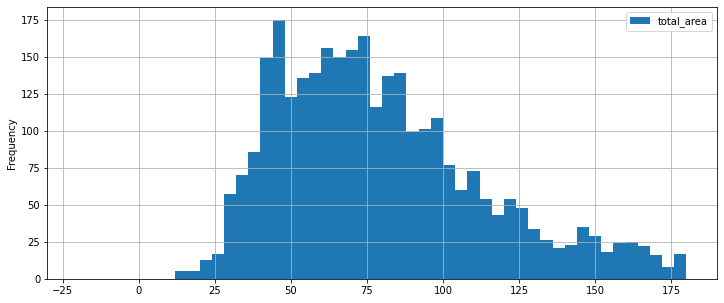

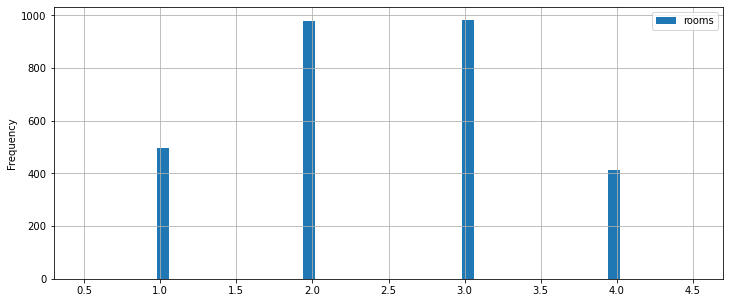

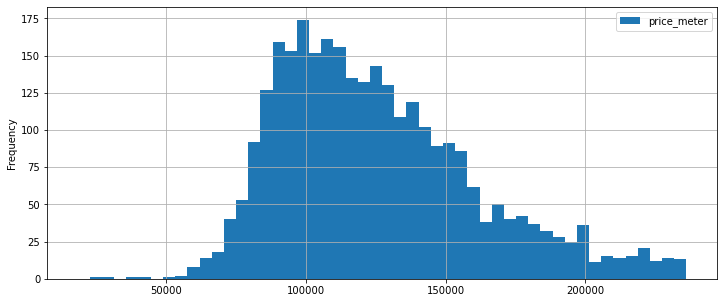

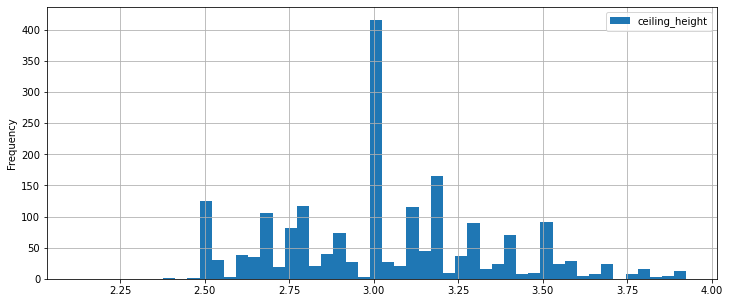

In [34]:
columns = ['total_area', 'rooms', 'price_meter', 'ceiling_height']
for column in columns:
    #расчет IQR для нахождения интервала наиболее вероятных значений 
    q1 = data_spb_center[column].quantile(0.25)
    q3 = data_spb_center[column].quantile(0.75)
    igr = q3 - q1
    data_spb_center.plot(kind = 'hist',y = column, bins = 50, grid=True, range = (q1 - 1.5*igr, q3 + 1.5*igr ), figsize = (12,5))

Большая часть продаваемых квартир по площади находятся в промежутке от 30 до 90 кв.метров. Продажи больших по площади квартир снижаются в соответствии с их размером.

Лучше всего продаются 2-комнатные и 3-комнатные квартиры, чуть меньше продается 1-комнатных и 4-комнатных. Далее в соответствиис увеличением количество комнат продажи значительно снижаются. 

Пик цен так же как приходится на 100000 рублей за кв.метр. Однако по графику видно, что в рассматриваемых данных больше дорогих квартир, чем в полной таблице.

Самая часто встречаемая высота потолков 3 метра.

В сравнении с общими выводами, в центре города Санкт-петербург чаще продаются квартиры больше по площади и чаще продаются 3-х комнатные квартиры, с более высокой высотой потолков и цена за кв.метр у них выше.

In [35]:
data_spb_center['total_area'].corr(data_good['price_meter'])

0.2583242997470902

In [36]:
data_spb_center['cityCenters_nearest'].corr(data_good['price_meter'])

-0.033095226252655686

Корреляция цены за кв.метр и общей площади также остается очень маленькой, но можно сказать, что при увеличении общей площади, увеличивается цена за кв.метр.

Корреляции между ценой за кв.метр и удаленностью от центра нет. Можно предположить, что это так, потому что рассматриваемые квартиры и так находятся очень близко к центру.

In [37]:
columns = ['floor_group', 'weekday_exposition', 'month_exposition', 'year_exposition']
for column in columns:
    display(data_spb_center.pivot_table(index=column, values='price_meter', aggfunc='median').sort_values('price_meter'))

,price_meter
floor_group,
первый,109099
последний,116363
другой,126927


,price_meter
weekday_exposition,
3,120370
1,120760
4,123728
2,125000
0,125191
5,126930
6,129032


,price_meter
month_exposition,
7,"117,132.00"
5,"117,283.00"
6,"117,968.00"
10,"119,742.50"
12,"119,836.00"
2,"121,319.00"
4,"123,654.50"
11,"123,931.00"
9,"124,363.50"


,price_meter
year_exposition,
2015,"112,000.00"
2016,"115,089.00"
2017,"120,726.00"
2018,"124,496.00"
2019,"135,741.50"


Средняя цена за кв.метр ниже всего на первом этаже, чуть выше на последнем этаже. На других этажах средня цена значительно выше первого и последнего этажей. Сопадает с общими результатами.

Самая высокая средняя цена за кв.метр у квартир выставленных на продажу в воскресенье, а самая низкая у квартир выставленных во вторник. Не совпадает с общими результатами.

Самая высокая средняя цена за кв.метр у квартир выставленных на продажу в марте, а самая низкая у квартир выставленных в июне и августе. Совпадает низкая цена за кв.метр в июне.

С 2015 по 2019 год средняя стоимость квадратного метра постепенно растет. Данных о продажах в 2014 нет. Сопадает с общими результатми.

### Вывод

В ходе исследовательского анализа данных для всей таблицы и выделенного сегмента квартир в центре Санкт-Петербурга изучены следующие параметры: площадь, цена, число комнат, высота потолков, а также построены гистораммы для каждого параметра.
Для всех данных получены следущие результаты:
- Большая часть продаваемых квартир по площади находятся в промежутке от 30 до 60 кв.метров. Продажи больших по площади квартир снижаются в соответствии с их размером.
- Лучше всего продаются 1-комнатные и 2-комнатные квартиры, чуть меньше продается 3-комнатных. 
- Распеределение цен на квадратный метр на данном интервале стремить к нормальному. Пик средней цены за кв.метр приходится на 100000 рублей за кв.метр.
- Самая часто встречаемая высота потолков примерно 2.5 метра.

В сравнении с общими выводами, в центре города Санкт-петербург чаще продаются квартиры больше по площади и чаще продаются 3-х комнатные квартиры, с более высокой высотой потолков и цена за кв.метр у них выше.

Также для обеих таблиц выделены факторы, которые влияют на стоимость квартиры:
- Средняя цена за кв.метр ниже всего на первом этаже, чуть выше на последнем этаже. На других этажах средня цена значительно выше первого и последнего этажей.
- Самая низкая средняя цена за кв.метр в июне.
- Стоимость квадратного метра постепенно растет с течением времени, если не вмешиваются экономические/политические факторы.

Также изучено время продажи квартиры: половина квартир продается в течение 3-х месяцев. Продажу можно считать быстрой, если квартира продалась примерно за месяц. А слишком долгой, если не продается больше 7-8 месяцев.

## Общий вывод

При предобработке данных насколько были обработаны пропущенные значения в столбцах `balcony`, `parks_around3000`, `ponds_around3000`,`locality_name`,`kitchen_area` и `living_area``days_exposition`.
Обработаны дубликаты в столбце `locality_name`. Также проверено отсутствие полных дубликатов.

Значения столбца `first_days_exposition` приведены к типу данных "дата". Столбца `is_apartment` к логическому типу данных.
А столбцы `floors_total`, `last_price`, `parks_around3000`, `ponds_around3000`, `days_exposition` приведены к целочисленному типу данных.

Рассчитаны и добавлены в таблицу столбцы 
- `price_meter` цена квадратного метра;
- `weekday_exposition` день недели, `month_exposition` месяц и `year_exposition` год публикации объявления;
- `floor_group` этаж квартиры; варианты — первый, последний, другой;
- `living_%_total` соотношение жилой и общей площади, а также `kitchen_%_total` отношение площади кухни к общей.

**Рекомендации**

Прошу обратить внимание на следущие проблемы в данных:
- Много пропусков в данных, полученных автоматически на основе картографических данных. Возможно система работает некорректно.
- Неочевидные дубликаты в столбце `locality_name`

**Вывод**

По результатам исследования были установлены паарметры, которые смогут помочь определять рыночную стоимость объектов недвижимости. Более подробно результаты описаны в п. 4.1.